In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string



In [2]:
# import and read dataset from https://www.kaggle.com/amruthjithrajvr/recruitment-scam
data = pd.read_csv("DataSet.csv")

In [3]:
# let's read the first top 5 rows from the dataset
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [4]:
# let's get the number of data points (rows) and the number of categories (columns)
data.shape

(17880, 18)

In [5]:
# determine the different categories being assessed
data.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'in_balanced_dataset'],
      dtype='object')

In [6]:
# in every column, let's see how many missing values there are
data.isnull().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                0
requirements            2689
benefits                7196
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
in_balanced_dataset        0
dtype: int64

In [7]:
# remove irrelevant columns
# axis=1 means the values are column values 
# inplace=true will make the changes permanent
data.drop(['salary_range', 'telecommuting', 'has_company_logo', 'has_questions', 'in_balanced_dataset'], axis=1, inplace=True)

In [8]:
data.shape
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,Other,Internship,NaN,NaN,Marketing,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,NaN,NaN,NaN,NaN,NaN,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f


In [9]:
# replace the NaN values with blank spaces
# inplace=True will make this change permanent
data.fillna(' ', inplace=True)

In [10]:
# create independent and dependent features
columns = data.columns.tolist()

# filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["fraudulent"]]

# store the variable (fraudulent) we are predicting
target = "fraudulent"

# define a random state
state = np.random.RandomState(42)
X = data[columns]
Y = data["fraudulent"]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

# print the shapes of X and Y
print(X.shape)
print(Y.shape)

from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler()
X_res, Y_res = under_sampler.fit_resample(X, Y)

df1 = pd.DataFrame(X_res)
df3 = pd.DataFrame(Y_res)

# the default behavior is join='outer' so we must change it to inner

result = pd.concat([df1, df3], axis=1, join='inner')
display(result)
data = result;

(17880, 12)
(17880,)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
6655,Data Modeler - SQL Data Modeling Agile Scrum E...,"US, DC, Washington",,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Data Modeler is required having...,<ul>\r\n<li>5+ years of experience in Data mod...,,Full-time,,,Information Technology and Services,,f
4976,Sr Java/Web Developer,"US, CA, Los Angeles",Engineering,"<p><b>ABOUT THE COMPANY: RANKER </b>(<a href=""...","<p><b>ABOUT THE COMPANY: RANKER </b>(<a href=""...",<p><b>THE RIGHT CANDIDATE = TECHNICAL EXPERIEN...,<p><b>WHY RANKER?</b></p>\r\n<p><b>NOT</b> bec...,Full-time,Mid-Senior level,Unspecified,Internet,Engineering,f
12131,Senior Salesperson/Store Manager,"NZ, N, Auckland",Crane Brothers,<p>Blue Dot HR works with some of the best sma...,<p>Crane Brothers are contemporary tailors sel...,,,,,,,,f
1214,Manager FP&A,"GB, LND,",Pharmaceuticals / Finance,,<p>An excellent opportunity has arisen at a gl...,<p>Requirements:</p>\r\n<ul>\r\n<li>ACA or CIM...,<p>In return you will receive:</p>\r\n<ul>\r\n...,,,,,,f
1359,Senior iOS Developer,"US, TX, Dallas",,,"<p><b>ABOUT our beloved company, BOTTLE ROCKET...",<p><b>ABOUT this position:</b></p>\r\n<p>As pa...,<p>Learn more about this job and other technic...,Full-time,Mid-Senior level,Unspecified,Information Technology and Services,Information Technology,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,<p>Student Positions Part-Time and Full-Time.<...,,,Part-time,,,,,t
17828,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,<p><b>LEARN TO EARN AN EXECUTIVE LEVEL INCOME<...,<p><b>What You Can Do.</b></p>\r\n<p><b> </b><...,<p><b>Who We Are</b></p>\r\n<p><b> </b></p>\r\...,,,,,,t
17829,Android Developer,"PL, MZ, Warsaw",,,<p>inFullMobile Sp. z o.o. is a mobile softwar...,<p>• A proven track record in Android / JAVA p...,<ul>\r\n<li>attractive salary (adequate to the...,,,,,,t
17830,Payroll Clerk,"US, NY, New York",,,<p>JOB DESCRIPTION<br><br>We are seeking a ful...,<p><br>JOB REQUIREMENTS<br><br>• High schoo...,<p>We offer a competitive salary and benefits ...,Full-time,,,Apparel & Fashion,Accounting/Auditing,t


In [11]:
data.isnull().sum()
# we finished cleaning our dataset!!

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [12]:
## Exploratory Data Analysis

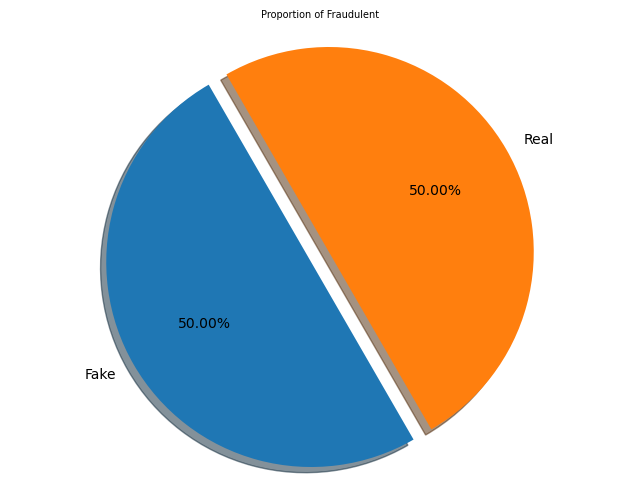

In [16]:
# Checking for distribution of class label (percentages belonging to real job listing and percentages belonging to fraudulent job listing)
# in the dataset, 1 means fraudulent listing and 0 means real listing

# Plotting pie chart for the data

labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 't'].count(), data.fraudulent[data['fraudulent']== 'f'].count()]
explode = (0, 0.1) # the explode function determines how the portions will appear
fig1, ax1 = plt.subplots(figsize=(8, 6)) #size of the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) #autopct %1.2f%% for 2 digit precision
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show() 

In [ ]:
# let's visualize which country is posting the most jobs!
# for this task, we will use the location column.
# the location data is in the form: county, state, city.
# however, we just need to know the country.

def split(location):
    l = location.split(',') # split the location where the comma is
    return l[0] # return the country only

data['country'] = data.location.apply(split)
data['country']

6655     US
4976     US
12131    NZ
1214     GB
1359     US
         ..
17827    US
17828    AU
17829    PL
17830    US
17831    US
Name: country, Length: 1732, dtype: object

In [19]:
# let's determine how many unique country values there are
data['country'].nunique()

49

In [20]:
# top 10 countries that post jobs
data['country'].value_counts()[:11]

country
US    1245
GB     136
AU      46
CA      41
GR      38
        34
IN      19
NZ      19
DE      15
MY      13
NL      11
Name: count, dtype: int64

Text(0.5, 0, 'Countries')

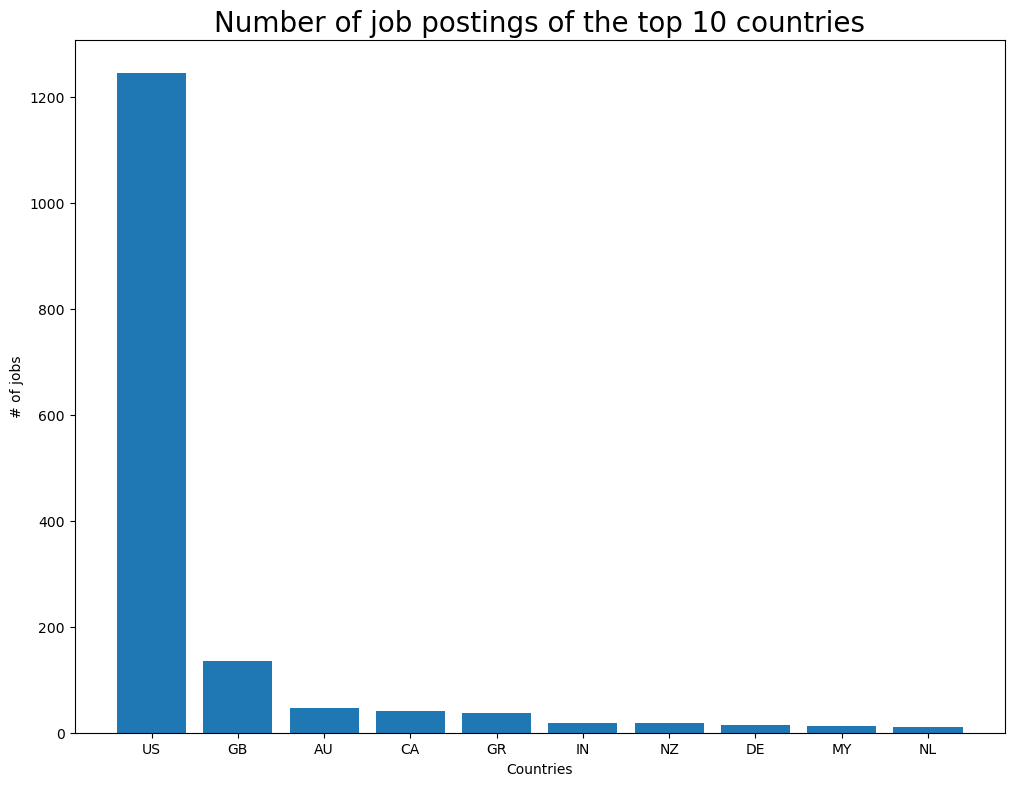

In [21]:
# create a dictionary with top 10 countries
country = dict(data.country.value_counts()[:11])
del country[' '] # delete the countries with space values (they are missing information from the dataset)
plt.figure(figsize=(12,9))
plt.title('Number of job postings of the top 10 countries', size=20)
plt.bar(country.keys(), country.values()) # x-axis, y-axis
plt.ylabel('# of jobs', size=10)
plt.xlabel('Countries', size=10)

In [22]:
country.keys()

dict_keys(['US', 'GB', 'AU', 'CA', 'GR', 'IN', 'NZ', 'DE', 'MY', 'NL'])

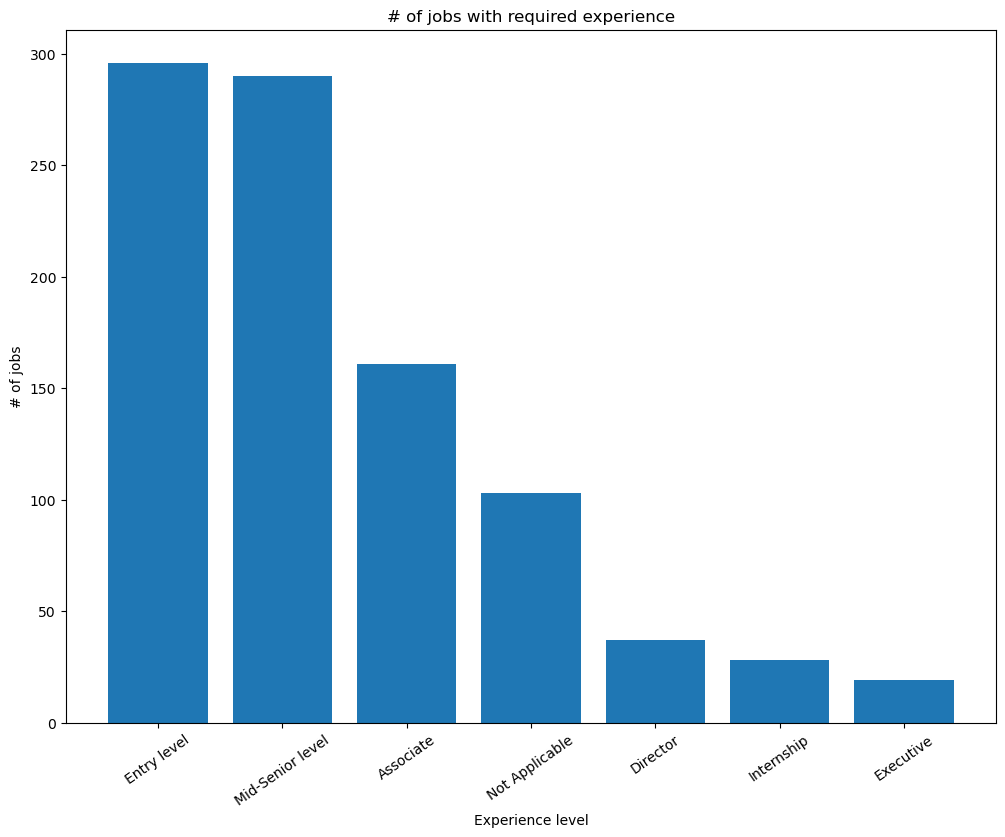

In [23]:
# visualizing the jobs based on required experience
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('# of jobs with required experience')
plt.xlabel('Experience level', size=10)
plt.ylabel('# of jobs', size=10)
plt.xticks(rotation= 35)
plt.show()

In [ ]:
# This data in unbalanced-- it contains 95% of real jobs and only 5% of fake jobs. Therefore, we must balance it.

In [24]:
# display the most frequent job roles
print(data.title.value_counts()[:10])

title
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Data Entry Admin/Clerical Positions - Work From Home                    21
English Teacher Abroad                                                  20
Customer Service Representative                                         19
Administrative Assistant                                                17
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Network Marketing                                                       10
Payroll Clerk                                                           10
Account Sales Managers $80-$130,000/yr                                  10
Name: count, dtype: int64


In [ ]:
# let's combine all the text for each datapoint, so we can create a word cloud of the most common words in the job listing titles
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']

In [ ]:
# we need to get rid of the html tags from the web scrapping
import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

data['text'] = data['text'].apply(remove_html_tags)

In [33]:
data.head()

,fraudulent,text
6655,f,Data Modeler - SQL Data Modeling Agile Scrum E...
4976,f,"Sr Java/Web Developer US, CA, Los Angeles ABOU..."
12131,f,"Senior Salesperson/Store Manager NZ, N, Auckla..."
1214,f,"Manager FP&A GB, LND, An excellent opportun..."
1359,f,"Senior iOS Developer US, TX, Dallas ABOUT ou..."


In [ ]:
## Understanding the common words used in the text: Wordcloud

In [34]:
# we will make 3 kinds of wordclouds.
# Wordcloud 1: visualize ALL the words in the data using the wordcloud plot
# Wordcloud 2: visualize common words in real job postings
# Wordcloud 3: visualize common words in fraudulent job postings

from wordcloud import WordCloud
all_words = ''.join([text for text in data["text"]])

In [35]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=120).generate(all_words)

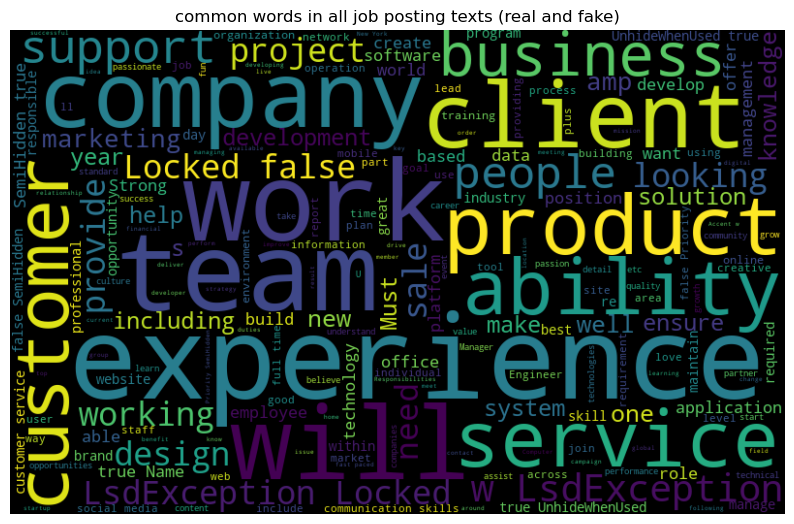

In [40]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('common words in all job posting texts (real and fake)')
plt.show()

In [37]:
# common words in real job posting texts

real_post = ''.join([text for text in data["text"][data['fraudulent']=='f']])
wordcloud = WordCloud(width = 800, height= 500, random_state=21, max_font_size=120).generate(real_post)



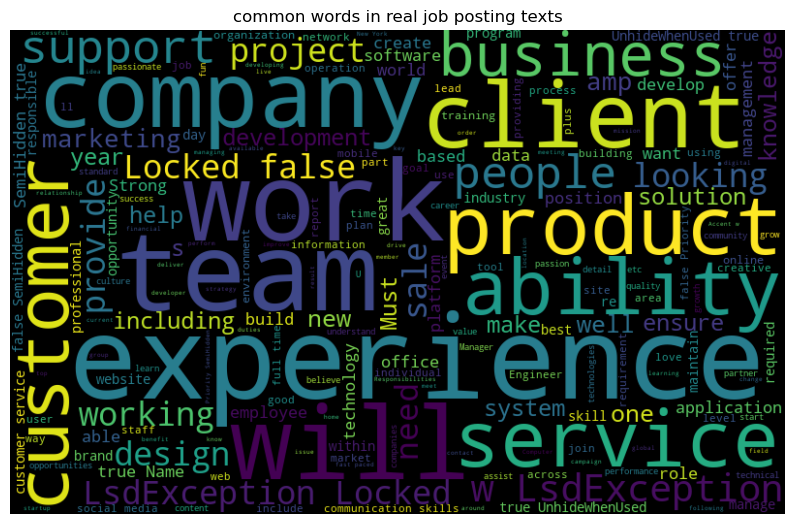

In [39]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('common words in real job posting texts')
plt.show()


In [41]:
# common words in fake job posting texts

real_post = ''.join([text for text in data["text"][data['fraudulent']=='t']])
wordcloud = WordCloud(width = 800, height= 500, random_state=21, max_font_size=120).generate(real_post)



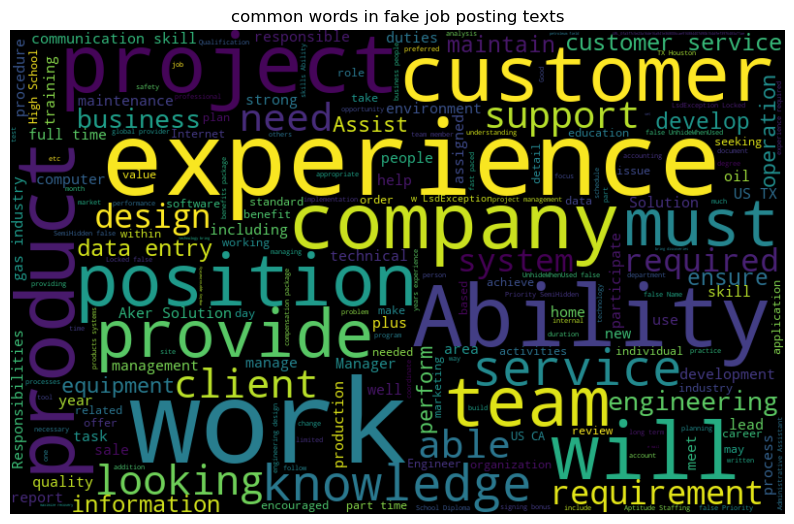

In [42]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('common words in fake job posting texts')
plt.show()


In [ ]:
## data preparation

In [44]:
# Natural Language Tookkit (NLTK)
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/palomavaldes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [46]:
# loading the stopwords
stop_words = set(stopwords.words("english"))

In [47]:
# converting all the text to lower case
data['text'] = data['text'].apply(lambda x:x.lower())

In [48]:
# removing the stop words from the corpus
data['text'] = data['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [51]:
data['text'][1214]

'manager fp&a gb, lnd, excellent opportunity arisen global pharmaceutical company, experienced financial planning analysis professional enhance team managerial level. interesting role, opportunity work within rapidly growing company uk based site. responsibilities include: conducting financial analysis provide strategic input senior management building emea knowledge work alongside senior management in-country fp&amp;a deliver budgets forecasts provide high quality analysis support projections variances provide project support emea leadership teams, including strategic insight drive performance process improvement support fp&amp;a director delivery management reporting develop best practice analysis support in-country fp&amp;a teams requirements: aca cima qualified ba bs degree extensive experience within financial planning analysis strong experience within pharmaceutical industry experience within projects excellent interpersonal skills return receive: highly competitive salary benefi

In [52]:
from sklearn.model_selection import train_test_split

# splitting dataset in train and test
X_train, X_test, Y_train, Y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [53]:
# what does X_train and Y_train contain
print(Y_train)
print(X_train)

17090    f
17784    t
9088     t
17556    t
4003     f
        ..
17712    t
12596    f
8062     f
271      f
17511    t
Name: fraudulent, Length: 1212, dtype: object
17090    software engineer games gr, b, thessaloniki to...
17784    home based payroll typist/data entry clerks po...
9088     mobile developer-back end us, wa, seattle clim...
17556    customer service representative enroll people ...
4003     customer service us, , client seeking customer...
                               ...                        
17712    ambulatory surgery endoscopy rn operations man...
12596    retail sales associate great place start caree...
8062     demand generation marketing manager us, , burb...
271      job fair - multiple oil & gas jobs! us, tx, ho...
17511    use spare time start earning us, ca, san franc...
Name: text, Length: 1212, dtype: object


In [54]:
# the model cannot process text data so we need to convert our data into vector format.
# we will be using Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)

In [55]:
# examine the document-term matrix
X_train_dtm

# display X_train data 
print(X_train_dtm)

# this is matrix representation, non-0 valued cells are not printed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 202093 stored elements and shape (1212, 15223)>
  Coords	Values
  (0, 23)	1
  (0, 239)	1
  (0, 512)	2
  (0, 535)	1
  (0, 651)	1
  (0, 697)	1
  (0, 702)	1
  (0, 705)	1
  (0, 773)	1
  (0, 776)	1
  (0, 879)	2
  (0, 908)	1
  (0, 947)	1
  (0, 988)	4
  (0, 999)	1
  (0, 1032)	1
  (0, 1039)	4
  (0, 1097)	1
  (0, 1204)	1
  (0, 1227)	1
  (0, 1277)	1
  (0, 1278)	1
  (0, 1345)	1
  (0, 1414)	1
  (0, 1707)	1
  :	:
  (1211, 12259)	1
  (1211, 12378)	1
  (1211, 12499)	1
  (1211, 12556)	1
  (1211, 12743)	1
  (1211, 12782)	1
  (1211, 12824)	1
  (1211, 12872)	1
  (1211, 12902)	4
  (1211, 12973)	1
  (1211, 12986)	1
  (1211, 12990)	2
  (1211, 13117)	1
  (1211, 13207)	1
  (1211, 13474)	1
  (1211, 13543)	2
  (1211, 13556)	1
  (1211, 13652)	1
  (1211, 14252)	1
  (1211, 14430)	1
  (1211, 14440)	1
  (1211, 14447)	2
  (1211, 15039)	2
  (1211, 15079)	1
  (1211, 15172)	1


In [56]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 84885 stored elements and shape (520, 15223)>

In [ ]:
## model building & evaluation

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [ ]:
## Naive Bayes

In [60]:
# Naive Bayes Classifier
# we are using Multinomial Naive Bayes approach because the data here is not symmetrical.
# generally, if there are data in the form of this long text, it is better to use %time to give the time taken by the system for execution

nb = MultinomialNB()
%time nb.fit(X_train_dtm, Y_train)

CPU times: user 12.2 ms, sys: 25.3 ms, total: 37.5 ms
Wall time: 61.9 ms


MultinomialNB()

In [61]:
Y_pred_nb = nb.predict(X_test_dtm)
print(Y_pred_nb)

['f' 't' 't' 'f' 't' 't' 'f' 't' 'f' 't' 't' 't' 'f' 'f' 't' 'f' 'f' 't'
 't' 't' 'f' 't' 't' 'f' 'f' 't' 'f' 't' 'f' 'f' 't' 'f' 'f' 'f' 't' 't'
 'f' 'f' 'f' 'f' 't' 't' 'f' 't' 't' 'f' 'f' 'f' 'f' 'f' 't' 't' 't' 'f'
 't' 'f' 't' 't' 't' 't' 't' 'f' 't' 'f' 't' 't' 't' 'f' 'f' 't' 't' 't'
 't' 'f' 't' 'f' 'f' 't' 't' 't' 't' 'f' 't' 't' 'f' 'f' 'f' 'f' 't' 't'
 't' 'f' 'f' 'f' 'f' 't' 'f' 'f' 'f' 't' 't' 'f' 'f' 't' 'f' 'f' 'f' 't'
 'f' 'f' 't' 't' 't' 't' 'f' 't' 'f' 't' 'f' 'f' 't' 'f' 't' 'f' 't' 'f'
 't' 'f' 'f' 't' 'f' 'f' 'f' 't' 't' 't' 't' 't' 'f' 'f' 'f' 't' 'f' 't'
 'f' 'f' 't' 't' 't' 'f' 't' 't' 't' 't' 't' 'f' 't' 't' 't' 'f' 't' 'f'
 'f' 'f' 'f' 't' 't' 'f' 'f' 'f' 'f' 'f' 't' 't' 'f' 'f' 'f' 't' 'f' 'f'
 't' 't' 'f' 'f' 't' 'f' 'f' 't' 'f' 'f' 't' 't' 't' 't' 't' 'f' 'f' 't'
 't' 'f' 't' 'f' 't' 't' 'f' 't' 't' 't' 'f' 'f' 't' 't' 'f' 'f' 't' 'f'
 'f' 't' 't' 'f' 't' 'f' 't' 'f' 'f' 'f' 't' 'f' 'f' 't' 'f' 'f' 'f' 'f'
 't' 't' 't' 't' 'f' 't' 'f' 't' 't' 't' 'f' 'f' 't

Classification Accuracy: 0.9057692307692308
Classification Report

              precision    recall  f1-score   support

           f       0.94      0.88      0.91       280
           t       0.87      0.94      0.90       240

    accuracy                           0.91       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.91      0.91      0.91       520

Confusion Matrix

[[246  34]
 [ 15 225]]


Text(95.72222222222221, 0.5, 'Truth')

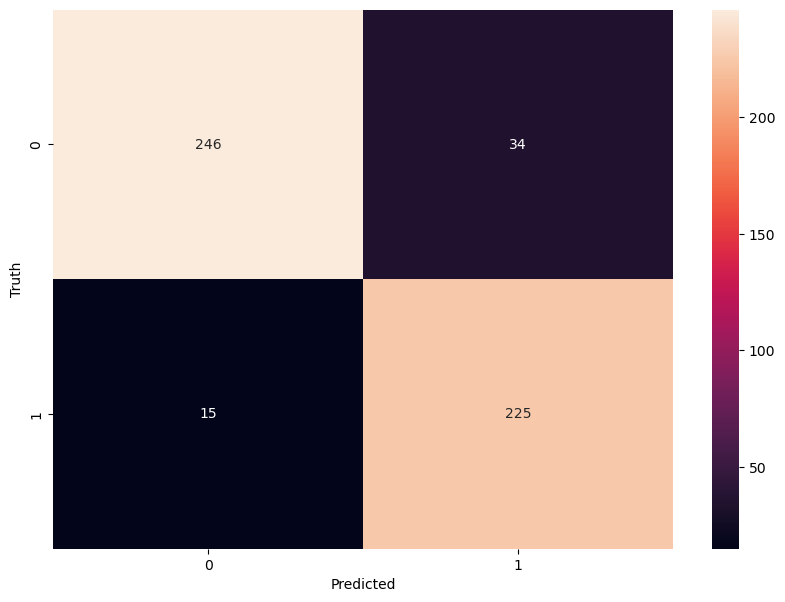

In [63]:
accuracy_score(Y_test, Y_pred_nb)

print("Classification Accuracy:", accuracy_score(Y_test, Y_pred_nb))
print("Classification Report\n")
print(classification_report(Y_test, Y_pred_nb))
print("Confusion Matrix\n")
print(confusion_matrix(Y_test, Y_pred_nb))

cm = confusion_matrix(Y_test, Y_pred_nb)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
## decision tree classifier

In [64]:
# instantiate a decision tree classifier
dt = DecisionTreeClassifier()

In [65]:
# train the model
# using X_train_dtm (timing it with %time )

%time dt.fit(X_train_dtm, Y_train)

CPU times: user 423 ms, sys: 39.9 ms, total: 463 ms
Wall time: 524 ms


DecisionTreeClassifier()

In [66]:
# make class predicitions for X_test_dtm
Y_pred_class = dt.predict(X_test_dtm)

In [67]:
# model accuracy
print("Classification Accuracy:", accuracy_score(Y_test, Y_pred_class))
print("Classification Report\n")
print(classification_report(Y_test, Y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(Y_test, Y_pred_class))

Classification Accuracy: 0.8653846153846154
Classification Report

              precision    recall  f1-score   support

           f       0.90      0.84      0.87       280
           t       0.83      0.90      0.86       240

    accuracy                           0.87       520
   macro avg       0.87      0.87      0.87       520
weighted avg       0.87      0.87      0.87       520

Confusion Matrix

[[235  45]
 [ 25 215]]


Text(95.72222222222221, 0.5, 'Truth')

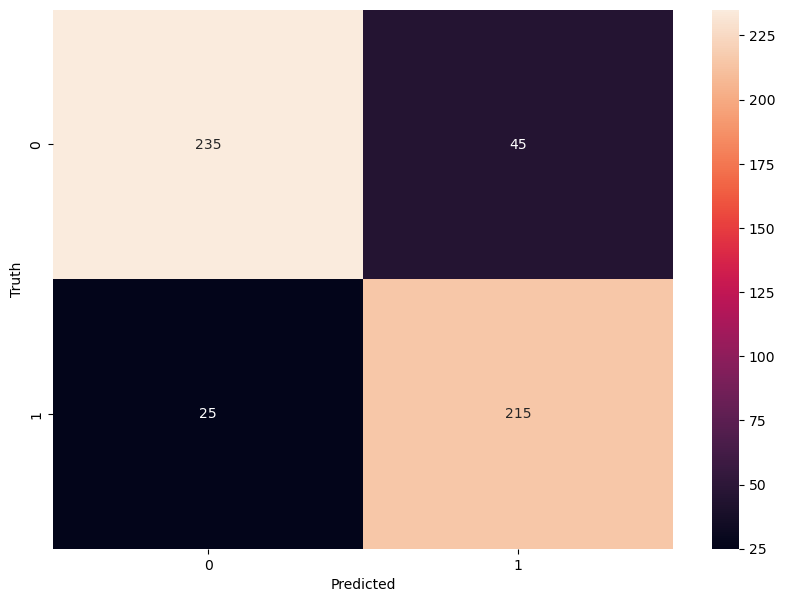

In [68]:
# confusion matrix

import seaborn as sn
cm = confusion_matrix(Y_test, Y_pred_class)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
## building a predictive system

In [ ]:
# let's predict a data point
X_test

17752    medical intake representative (data entry) us,...
17619    job vacancy st.ermin's hotel london br, , st. ...
9096     restaurant manager - le meridien kl my, , awar...
8860     video editor in, mh, mumbai candidate video re...
8839     assembly technician us, mo, maryland heights c...
                               ...                        
13185    human centered industrial designer us, ca, man...
1202     big data engineer us, ca, san francisco positi...
17763    cruise staff wanted *urgent* us, fl, miami 6* ...
11224    production artist us, tx, austin emerging tech...
11548    mobile developer-back end us, ca, san francisc...
Name: text, Length: 520, dtype: object

In [71]:
print(X_test[1202])

big data engineer us, ca, san francisco position: big data engineer location: san francisco, ca duration: 6+ months cth skills: bi hadoop- java mapreduce- rdbms- job description: senior business intelligence engineer advanced analytics overall theme. guide move forward advanced system providing sophisticated measurable business benefits. person work closely business analysts, well internal business users understand key business drivers data needs, scope scalable suitable solutions help customers information needed planning, analysis, decision-making. responsibilities: ability analyze business needs translate approach options pro’s cons approach design implement next generation crm applications hadoop handle high data volumes execute analysis tools hadoop distributed environment assist supporting, migrating refactoring reports existing bi solutions. support group multi-disciplinary data professionals analysts. assist defining development project plans, including scoping, scheduling, pro

In [79]:
input_text=["customer service associate us, ca, san francisco novitex enterprise solutions, formerly pitney bowes management services, delivers innovative document communications management solutions help companies around world drive business process efficiencies, increase productivity, reduce costs improve customer satisfaction. almost 30 years, clients turned us integrate optimize enterprise-wide business processes empower employees, increase productivity maximize results. trusted partner, continually focus delivering secure, technology-enabled document communications solutions improve clients' work processes, enhance customer interactions drive growth. customer service associate based san francisco, ca. right candidate integral part talented team, supporting continued growth.responsibilities:perform various mail center activities (sorting, metering, folding, inserting, delivery, pickup, etc.)lift heavy boxes, files paper neededmaintain highest levels customer care demonstrating friendly cooperative attitudedemonstrate flexibility satisfying customer demands high volume, production environmentconsistently adhere business procedure guidelinesadhere safety procedurestake direction supervisor site managermaintain logs reporting documentation; attention detailparticipate cross-training perform duties assigned (filing, outgoing shipments, etc)operating mailing, copy scanning equipmentshipping & receivinghandle time-sensitive material like confidential, urgent packagesperform tasks assignedscanning incoming mail recipientsperform file purges pullscreate files ship filesprovide backfill neededenter information daily spreadsheetsidentify charges match billingsort deliver mail, small packages minimum requirements:minimum 6 months customer service related experience requiredhigh school diploma equivalent (ged) requiredpreferred qualifications:keyboarding windows environment pc skills required (word, excel powerpoint preferred)experience running mail posting equipment plusexcellent communication skills verbal writtenlifting 55 lbs without accommodationswillingness availability work additional hours assignedwillingness submit pre-employment drug screening criminal background checkability effectively work individually team environmentcompetency performing multiple functional tasksability meet employer's attendance policy computer software"]

In [80]:
# we need to convert this text to vector form
input_data_features = vect.transform(input_text)

# making prediction
prediction = dt.predict(input_data_features)
print(prediction)

if (prediction[0]=='t'):
    print('Prediction: Fraudulent job')
else:
    print('Prediction: Real job')

['f']
Prediction: Real job


In [81]:
# let's check if the prediction was correct
print(Y_test[1202])

t
